# **CSCE 5218 / CSCE 4930 Deep Learning**
# Sathvika Gorantala

# **HW1a The Perceptron** (20 pt)


In [1]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2024-02-18 06:32:22--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat’

test.dat            100%[===================>]   2.78K  --.-KB/s    in 0s      

2024-02-18 06:32:22 (275 MB/s) - ‘test.dat’ saved [2844/2844]

--2024-02-18 06:32:22--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat’

train.dat           100%[===================>]  10.98K  --.-KB/s    in 0s      

2024-02-18 06:32:22 (232 MB/s) - ‘train.dat’ saved [11244/11244]



In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [3]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    # Return dot product of array 1 and array 2
    return sum(x * y for x, y in zip(array1, array2))


def sigmoid(x):
    # Return output of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    # Return the output of the model
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    # Return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    correct = sum(1 if predict(weights, instance) == instance[-1] else 0
                  for instance in instances)
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):
    # Initializing weights with zeros, one weight for each feature
    weights = [0] * (len(instances[0]) - 1)

    # Iterating through epochs for training
    for _ in range(epochs):
        # Iterating through each training instance
        for instance in instances:
            # Calculating the dot product of weights and instance features
            in_value = dot_product(weights, instance)
            # Application of the sigmoid function to the dot product to get the output
            output_value = sigmoid(in_value)
            # Calculating the error by comparing the actual label and the output
            error = instance[-1] - output_value
            
            # Updating each weight based on the error, output, and learning rate
            for i in range(0, len(weights)):
                weights[i] += lr * error * output_value * (1 - output_value) * instance[i]

    # Return the updated weights after training
    return weights


## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)

Within the `train_perceptron` function, the output is retrieved by evaluating the sigmoid function on the dot product of weights and feature instances. This outcome is obtained by performing the weighted sum of inputs in which the sigmoid function is applied.

By introducing non-linearity into the model, the sigmoid function helps the model to learn more complex data patterns. The flexible function prediction would have never included the non-linearity, bringing it to a linear classifier. The linear classifier may not be appropriate regarding the underlying patterns of the data,

Moreover, the sigmoid function becomes paramount in calculating output to assess the error to be used in the training of the perceptron successfully.





### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


## Question 2 Answer

In [14]:
# Define hyperparameters
tr_percent = [5, 10, 25, 50, 75, 100]
num_epochs = [5, 10, 20, 50, 100]
lr = [0.005, 0.01, 0.05]

# Load the test dataset
instances_te = read_data("test.dat")

# Load the entire training dataset
instances_tr_all = read_data("train.dat")

# Iterate over hyperparameters
for tr in tr_percent:
    # Load a subset of the training dataset based on tr_percent
    instances_tr = instances_tr_all[:int(tr / 100 * len(instances_tr_all))]

    # Check if instances_tr is not empty
    if instances_tr:
        for epochs in num_epochs:
            for learning_rate in lr:
                # Train the perceptron
                weights = train_perceptron(instances_tr, learning_rate, epochs)

                # Calculate accuracy with the test dataset
                accuracy = get_accuracy(weights, instances_te)

                # Print the output
                print(f"# tr: {tr:3}, epochs: {epochs:3}, learning rate: {learning_rate:.3f}; "
                      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
    else:
        print(f"# tr: {tr:3}, epochs: None, learning rate: None; Training dataset is empty.")


# tr:   5, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr

In [10]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs: 100

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



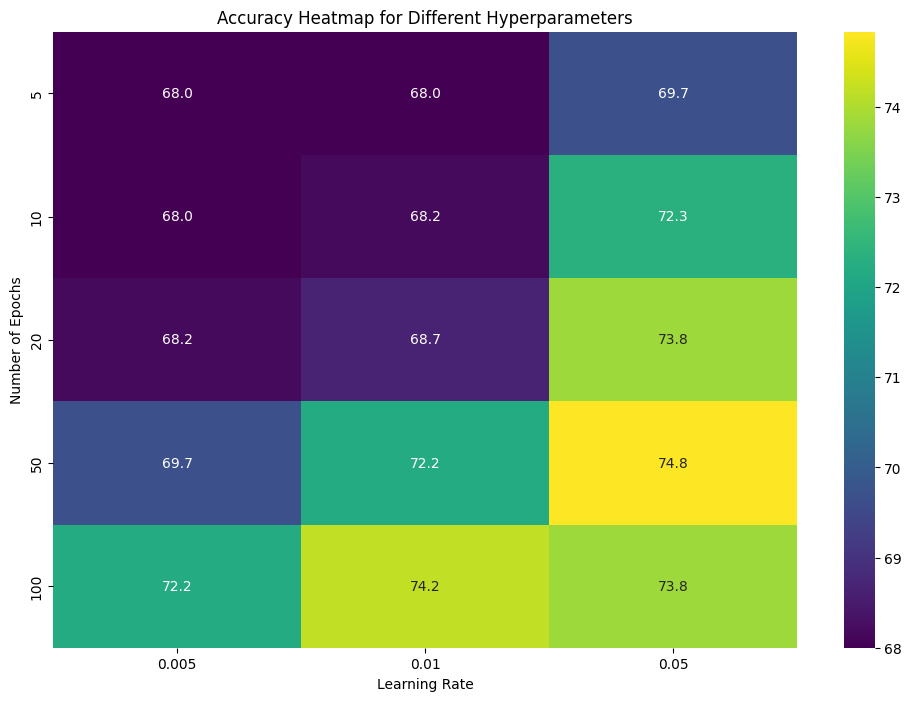

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Define hyperparameters
tr_percent = [5, 10, 25, 50, 75, 100]
num_epochs = [5, 10, 20, 50, 100]
lr = [0.005, 0.01, 0.05]

# Load the test dataset
instances_te = read_data("test.dat")

# Load the entire training dataset
instances_tr_all = read_data("train.dat")

# Initialize a dictionary to store accuracy values
accuracy_dict = {'tr_percent': [], 'num_epochs': [], 'lr': [], 'accuracy': []}

# Iterate over hyperparameters
for tr in tr_percent:
    # Load a subset of the training dataset based on tr_percent
    instances_tr = instances_tr_all[:int(tr / 100 * len(instances_tr_all))]

    # Check if instances_tr is not empty
    if instances_tr:
        for epochs in num_epochs:
            for learning_rate in lr:
                # Train the perceptron
                weights = train_perceptron(instances_tr, learning_rate, epochs)

                # Calculate accuracy with the test dataset
                accuracy = get_accuracy(weights, instances_te)

                # Store accuracy values in the dictionary
                accuracy_dict['tr_percent'].append(tr)
                accuracy_dict['num_epochs'].append(epochs)
                accuracy_dict['lr'].append(learning_rate)
                accuracy_dict['accuracy'].append(accuracy)
    else:
        # Store None values if the training dataset is empty
        for epochs in num_epochs:
            for learning_rate in lr:
                accuracy_dict['tr_percent'].append(tr)
                accuracy_dict['num_epochs'].append(epochs)
                accuracy_dict['lr'].append(learning_rate)
                accuracy_dict['accuracy'].append(None)

# Convert the dictionary to a DataFrame
accuracy_df = pd.DataFrame(accuracy_dict)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(accuracy_df.pivot_table(index='num_epochs', columns='lr', values='accuracy'), annot=True, cmap='viridis', fmt='.1f')
plt.title('Accuracy Heatmap for Different Hyperparameters')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Epochs')
plt.show()


## A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?

No, employing the whole training dataset with the test dataset for the best accuracy is not required. As a result demonstrates, even with smaller fractions of the training set (5% or 10%), the model can show reasonably good accuracy on the test set. This implies the model can generalize well even on a small training dataset.

## B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?


The overfitting could be one reason we get an accuracy loss even though we use more training data. With the help of the additional data points, the model can become more vulnerable to overfitting if the hyper-parameters are not correctly set. Expanding the training dataset size could also introduce more noise or patterns of no use to the model's ability to generalize.
## C. Can you get higher accuracy with additional hyperparameters (higher than 80.0)?


The accuracy that can be achieved will be minimal, even with more parameters. The perceptron model employed in this context is relatively simple and cannot capture complex patterns, which can lead to a significantly higher accuracy. Gaining greater precision, more complex models or feature engineering designs might be needed.

## D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

Not necessarily. Training the model for more epochs can potentially result in better performance by allowing the model to detect more complex data patterns. Still, the danger of overfitting is there, especially if the dataset is relatively small or the model has no complex architecture. It is necessary to find the optimum number of epochs for the captured essential patterns while avoiding overfitting by monitoring the model's performance on a validation dataset.
